**Método dos mínimos quadrados**

In [5]:
# Importar a biblioteca pasa uso de algoritmos matemáticos
import numpy as np

**Carregando valores do arquivo**

In [6]:
# Ler o arquivo .txt e extrair uma coluna específica
iz = np.loadtxt('TDZV6_8.txt', delimiter='\t', usecols=(0,))
vz = np.loadtxt('TDZV6_8.txt', delimiter='\t', usecols=(1,))

**Filtrando dados para faixa desejada**

In [7]:
posicao_min = np.argmax(iz > 0.0292)
posicao_max = np.argmax(iz > 0.0632)
iz_filtrado = iz[posicao_min:posicao_max]
vz_filtrado = vz[posicao_min:posicao_max]

Xi=np.array(iz_filtrado)
Yi=np.array(vz_filtrado)


**Gerando gráfico para observar se há um comportamento linear**

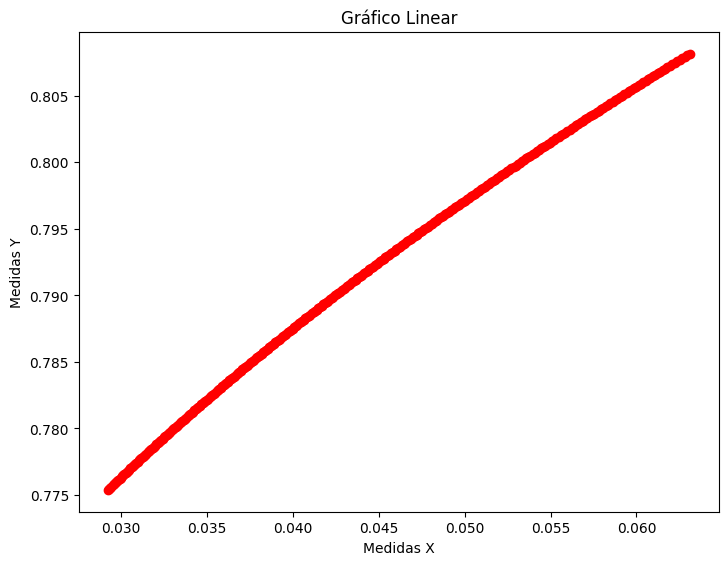

In [8]:
#Uma vez havendo um comportamento próximo ao linear pode aplicar-se o MMQ para ajuste linear
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(Xi, Yi, color='r')
#ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('Medidas X')
ax.set_ylabel('Medidas Y')
ax.set_title('Gráfico Linear')
plt.show()

In [9]:
# Entendendo um comportamento próximo do linear aplica-se o MMQ

#n significa o número de medida das variáveis
n=len(iz_filtrado)

#Obtenção dos termos Xi^2 e Xi*Yi
Xi2=Xi**2
XiYi=Xi*Yi

#Cálculo dos coeficientes a e b pelo MMQ
a = (sum(Xi)*sum(Yi) -n*sum(XiYi))/(sum(Xi)**2 -n*sum(Xi2))
b = (sum(XiYi)*sum(Xi) - sum(Xi2)*sum(Yi))/(sum(Xi)**2 -n*sum(Xi2))
#print('O somatorio de X:',sum(Xi),"\n",'O somatorio de Y:',sum(Yi),"\n",'O somatorio de X*Y:',sum(XiYi),"\n",'O somatorio de X^2:',sum(Xi2),"\n")
print(f'O valor da constante a é: {a}',"\n",f'O valor da constante b é: {b}')

O valor da constante a é: 0.9699591826268725 
 O valor da constante b é: 0.7482166348129465


In [10]:
# Criar lista de valores ajustados
Ya=[]
for i in range(n):
  y= a*Xi[i] + b
  Ya.append(y)

**GRÁFICO AJUSTADO**

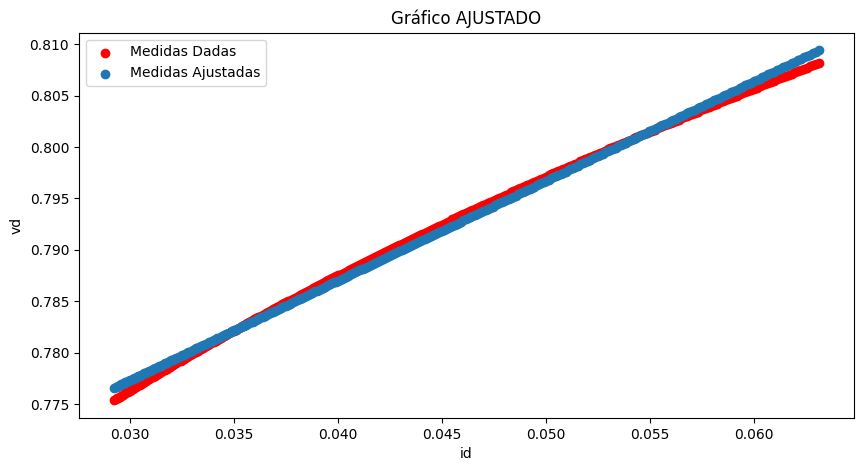

In [11]:
#Gerando o gráfico com as medidas e comparando com o ajuste
fig = plt.figure(figsize=(10,5)) 
plt.scatter(Xi, Yi, label = "Medidas Dadas", color='r')
plt.scatter(Xi, Ya, label = "Medidas Ajustadas")
plt.xlabel('id')
plt.ylabel('vd')
plt.title('Gráfico AJUSTADO')
plt.legend()  
plt.plot(Xi, Ya)

#Salva a figura em uma pasta gerada
fig.savefig('lineplot.jpg', bbox_inches='tight', dpi=150)
plt.show() 

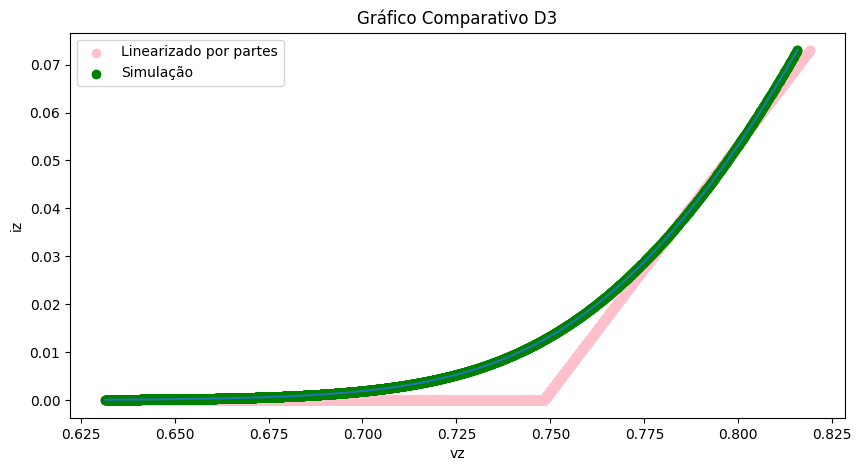

In [12]:
#Gerando o gráfico com as medidas e comparando com o ajuste
fig = plt.figure(figsize=(10,5))

#MetodoLinearizado por partes
vz0 = b
rz = a
vz_partes_conduz = vz0 + (rz * iz)
posicao_vz0 = np.argmax(vz > vz0)
vz_partes_zeros = vz[:posicao_vz0]
iz_partes_zeros = np.zeros(len(vz_partes_zeros))
vz_partes = np.concatenate((vz_partes_zeros, vz_partes_conduz))
iz_partes = np.concatenate((iz_partes_zeros, iz))

plt.scatter(vz_partes, iz_partes, label = "Linearizado por partes", color='pink')
plt.scatter(vz, iz, label = "Simulação", color= 'green')
plt.xlabel('vz')
plt.ylabel('iz')
plt.title('Gráfico Comparativo D3')
plt.legend()  
plt.plot(vz, iz)


#Salva a figura em uma pasta gerada
fig.savefig('lineplot.jpg', bbox_inches='tight', dpi=150)
plt.show() 